In [1]:
# Dependencies
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime


In [2]:
#### INFLATION 
# Set files
cpi_csv = Path("..\\project-1-draft\\Resources\\Inflation\\CPI Australia.csv")
inflation_csv = Path("..\\project-1-draft\\Resources\\Inflation\\Inflation Tradable & Non-tradable, annual movement.csv")

In [3]:
# Read CSV files into DataFrames
cpi_df = pd.read_csv(cpi_csv)
inflation_df = pd.read_csv(inflation_csv)

In [4]:
# Display first few rows
cpi_df.head()
inflation_df.head()

,Date,Tradables,Non-tradables,Median
0,2018,0.6,2.4,1.50
1,2019,1.7,2.0,1.85
2,2020,-0.6,1.5,0.45
3,2021,4.9,2.8,3.85
4,2022,8.7,7.4,8.05


In [5]:
# Create dictionaries
cpi_data = {'Date_cpi': ['2018', '2019', '2020', '2021', '2022', '2023'], 'Value_cpi': [1.8, 1.8, 0.9, 3.5, 7.8, 4.1]}
inflation_data = {'Date_inflation': ['2018', '2019', '2020', '2021', '2022', '2023'], 'Value_inflation': [1.5, 1.85, 0.45, 3.85, 8.05, 3.45]}

# Convert dictionaries to DataFrames
cpi_df = pd.DataFrame(cpi_data)
inflation_df = pd.DataFrame(inflation_data)

In [6]:
# Merge DataFrames on date columns
data_df = pd.merge(cpi_df, inflation_df, left_on='Date_cpi', right_on='Date_inflation')

data_df


,Date_cpi,Value_cpi,Date_inflation,Value_inflation
0,2018,1.8,2018,1.50
1,2019,1.8,2019,1.85
2,2020,0.9,2020,0.45
3,2021,3.5,2021,3.85
4,2022,7.8,2022,8.05
5,2023,4.1,2023,3.45


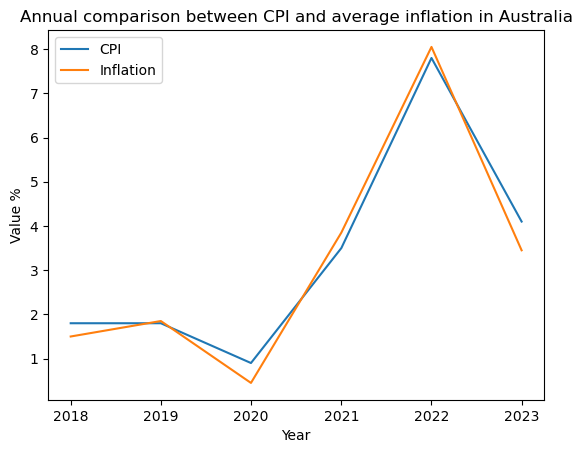

In [7]:
# Convert 'Date_cpi' column to datetime
data_df['Date_cpi'] = pd.to_datetime(data_df['Date_cpi'])

# Sort DataFrame by 'Date_cpi' column
data_df = data_df.sort_values('Date_cpi')

# Plot
plt.plot(data_df['Date_cpi'], data_df['Value_cpi'], label='CPI')
plt.plot(data_df['Date_cpi'], data_df['Value_inflation'], label='Inflation')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Value %')
plt.title('Annual comparison between CPI and average inflation in Australia')
plt.legend()
plt.show()

In [8]:
#### FUEL DATA

In [9]:
## FUEL BULK PRICING - BRENT, EXCHANGE RATE

In [10]:
fuel_csv = Path("Resources/Fuel pricing/Dist Fuel Pricing 2019-2023.csv")
fuel_data = pd.read_csv(fuel_csv,skiprows=[])
fuel_data['DATE'] = pd.to_datetime(fuel_data['DATE'], format='%d/%m/%Y')
fuel_data= fuel_data.sort_values('DATE')
fuel_data

,DATE,Brent,Up/Down,Exchange Rate,Up/Down.1,CHANGE,VIVA TGP,BP,CALTEX,MOBIL,RSG,Change,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,2018-01-01,60.42,0.00,78,0,0,122.23,123.01,128.63,106.56,109.20,0.27,NaN,NaN,NaN,NaN,NaN
1,2018-01-02,60.42,0.00,78.42,0.42,0.42,122.23,123.01,129.17,106.56,109.20,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-03,60.37,0.05,78.42,0,0.05,122.72,123.85,129.5,107.33,109.64,0.44,NaN,NaN,NaN,NaN,NaN
3,2018-01-04,61.63,1.26,78.61,0.19,1.07,123.49,124.1,129.5,107.56,110.34,0.7,NaN,NaN,NaN,NaN,NaN
4,2018-01-05,62.01,0.38,78.41,0.2,0.58,123.61,123.97,129.75,107.56,110.45,0.11,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2186,2023-12-27,80.87,1.80,68.24,0.26,1.54,175.02,173.96,179.56,153.07,154.19,0.02,NaN,NaN,NaN,NaN,NaN
2187,2023-12-28,79.63,-1.24,68.44,0.2,-1.44,175.09,174.17,179.54,153.73,154.25,0.06,NaN,NaN,NaN,NaN,NaN
2188,2023-12-29,78.39,-1.24,68.35,-0.09,-1.15,174.78,173.39,178.75,153.54,153.97,-0.28,NaN,NaN,NaN,NaN,NaN
2189,2023-12-30,77.04,-1.35,68.14,-0.21,-1.14,174.20,171.43,177.8,152.82,153.44,-0.53,NaN,NaN,NaN,NaN,NaN


In [11]:
#clean data 
fuel_dropcol=fuel_data.drop(columns=['CHANGE','Unnamed: 12','Unnamed: 13','Unnamed: 14', 'Unnamed: 15','Unnamed: 16'])
fuel_dropnan=fuel_dropcol.dropna()
fuel_dropnan

,DATE,Brent,Up/Down,Exchange Rate,Up/Down.1,VIVA TGP,BP,CALTEX,MOBIL,RSG,Change
0,2018-01-01,60.42,0.00,78,0,122.23,123.01,128.63,106.56,109.20,0.27
2,2018-01-03,60.37,0.05,78.42,0,122.72,123.85,129.5,107.33,109.64,0.44
3,2018-01-04,61.63,1.26,78.61,0.19,123.49,124.1,129.5,107.56,110.34,0.7
4,2018-01-05,62.01,0.38,78.41,0.2,123.61,123.97,129.75,107.56,110.45,0.11
5,2018-01-06,61.44,0.57,78.61,0.2,123.42,124.28,129.62,107.78,110.28,0.17
...,...,...,...,...,...,...,...,...,...,...,...
2185,2023-12-26,79.07,0.00,67.98,-0.03,175.00,173.96,179.56,153.07,154.17,0.33
2186,2023-12-27,80.87,1.80,68.24,0.26,175.02,173.96,179.56,153.07,154.19,0.02
2187,2023-12-28,79.63,-1.24,68.44,0.2,175.09,174.17,179.54,153.73,154.25,0.06
2188,2023-12-29,78.39,-1.24,68.35,-0.09,174.78,173.39,178.75,153.54,153.97,-0.28


In [12]:
#renaming COLUMN HEADERS 
fuel_df=fuel_dropnan.rename(columns={"DATE": "Date","Up/Down": "Brent Movement",
                                         "Up/Down.1": "Exchange rate movement","Change": "RSGG Change",
                                         })

fuel_df['Year'] = fuel_df['Date'].dt.year
fuel_df

,Date,Brent,Brent Movement,Exchange Rate,Exchange rate movement,VIVA TGP,BP,CALTEX,MOBIL,RSG,RSGG Change,Year
0,2018-01-01,60.42,0.00,78,0,122.23,123.01,128.63,106.56,109.20,0.27,2018
2,2018-01-03,60.37,0.05,78.42,0,122.72,123.85,129.5,107.33,109.64,0.44,2018
3,2018-01-04,61.63,1.26,78.61,0.19,123.49,124.1,129.5,107.56,110.34,0.7,2018
4,2018-01-05,62.01,0.38,78.41,0.2,123.61,123.97,129.75,107.56,110.45,0.11,2018
5,2018-01-06,61.44,0.57,78.61,0.2,123.42,124.28,129.62,107.78,110.28,0.17,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
2185,2023-12-26,79.07,0.00,67.98,-0.03,175.00,173.96,179.56,153.07,154.17,0.33,2023
2186,2023-12-27,80.87,1.80,68.24,0.26,175.02,173.96,179.56,153.07,154.19,0.02,2023
2187,2023-12-28,79.63,-1.24,68.44,0.2,175.09,174.17,179.54,153.73,154.25,0.06,2023
2188,2023-12-29,78.39,-1.24,68.35,-0.09,174.78,173.39,178.75,153.54,153.97,-0.28,2023


In [13]:
#finding the movement for three of the fuel companies
viva_move=fuel_df['Viva Movement'] = fuel_df['VIVA TGP'].diff()
mobil_move=fuel_df['Mobil Movement'] = fuel_df['MOBIL'].diff()

#change caltex to numeric 
fuel_df['CALTEX'] = pd.to_numeric(fuel_df['CALTEX'])
Caltex_move=fuel_df['Caltex Movement'] = fuel_df['CALTEX'].diff()
fuel_df

,Date,Brent,Brent Movement,Exchange Rate,Exchange rate movement,VIVA TGP,BP,CALTEX,MOBIL,RSG,RSGG Change,Year,Viva Movement,Mobil Movement,Caltex Movement
0,2018-01-01,60.42,0.00,78,0,122.23,123.01,128.63,106.56,109.20,0.27,2018,NaN,NaN,NaN
2,2018-01-03,60.37,0.05,78.42,0,122.72,123.85,129.50,107.33,109.64,0.44,2018,0.49,0.77,0.87
3,2018-01-04,61.63,1.26,78.61,0.19,123.49,124.1,129.50,107.56,110.34,0.7,2018,0.77,0.23,0.00
4,2018-01-05,62.01,0.38,78.41,0.2,123.61,123.97,129.75,107.56,110.45,0.11,2018,0.12,0.00,0.25
5,2018-01-06,61.44,0.57,78.61,0.2,123.42,124.28,129.62,107.78,110.28,0.17,2018,-0.19,0.22,-0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,2023-12-26,79.07,0.00,67.98,-0.03,175.00,173.96,179.56,153.07,154.17,0.33,2023,0.37,0.00,0.00
2186,2023-12-27,80.87,1.80,68.24,0.26,175.02,173.96,179.56,153.07,154.19,0.02,2023,0.02,0.00,0.00
2187,2023-12-28,79.63,-1.24,68.44,0.2,175.09,174.17,179.54,153.73,154.25,0.06,2023,0.07,0.66,-0.02
2188,2023-12-29,78.39,-1.24,68.35,-0.09,174.78,173.39,178.75,153.54,153.97,-0.28,2023,-0.31,-0.19,-0.79


In [14]:
years = [2018,2019,2020,2021, 2022, 2023]  # List of years
averages = []
for year in years:
    condition = fuel_df['Year'] == year
    average = fuel_df.loc[condition, 'Viva Movement'].mean()
    perc_viva=average*100
    averages.append({'Year': year, 'Viva Movement': perc_viva})

Viva_averages = pd.DataFrame(averages)
Viva_averages

,Year,Viva Movement
0,2018,-1.306604
1,2019,7.364706
2,2020,-55.747126
3,2021,128.463415
4,2022,19.350598
5,2023,-6.453846


In [15]:
years = [2018,2019,2020,2021, 2022, 2023]  # List of years
averages1 = []
for year in years:
    condition1 = fuel_df['Year'] == year
    average1 = fuel_df.loc[condition1, 'Mobil Movement'].mean()
    perc_Mobil=average1*100
    averages1.append({'Year': year, 'Mobil Movement': perc_Mobil})

Mobil_averages = pd.DataFrame(averages1)
Mobil_averages

,Year,Mobil Movement
0,2018,-0.641509
1,2019,6.372549
2,2020,-50.988506
3,2021,114.536585
4,2022,17.948207
5,2023,-6.261538


In [16]:
# List of years
years = [2018,2019,2020,2021, 2022, 2023]  
averages2 = []
for year in years:
    condition2 = fuel_df['Year'] == year
    average2 = fuel_df.loc[condition2, 'Caltex Movement'].mean()
    perc_caltex=average2*100
    averages2.append({'Year': year, 'Caltex Movement': perc_caltex})

caltex_averages = pd.DataFrame(averages2)
caltex_averages

,Year,Caltex Movement
0,2018,-1.599057
1,2019,7.588235
2,2020,-56.195402
3,2021,129.073171
4,2022,19.613546
5,2023,-7.711538


In [17]:
#merge all three companies into a dataframe 
fuel_mobil_caltex = pd.merge(Mobil_averages, caltex_averages, left_index=True, right_index=True)
fuel_mobil_caltex_viva = pd.merge(fuel_mobil_caltex, Viva_averages, left_index=True, right_index=True)
#new order 
new_order = ['Year', 'Viva Movement', 'Mobil Movement','Caltex Movement']
fuel_mobil_caltex_viva =fuel_mobil_caltex_viva[new_order]
fuel_mobil_caltex_viva

,Year,Viva Movement,Mobil Movement,Caltex Movement
0,2018,-1.306604,-0.641509,-1.599057
1,2019,7.364706,6.372549,7.588235
2,2020,-55.747126,-50.988506,-56.195402
3,2021,128.463415,114.536585,129.073171
4,2022,19.350598,17.948207,19.613546
5,2023,-6.453846,-6.261538,-7.711538


In [18]:
# Convert the 'Exchange Rate' column to numeric
fuel_df['Exchange rate movement'] = pd.to_numeric(fuel_df['Exchange rate movement'], errors='coerce')

# Group the exchange rate data by year
grouped_data = fuel_df.groupby('Year')

# Calculate the average exchange rate for each year
average_exchange_rate = grouped_data['Exchange rate movement'].mean()
perc=average_exchange_rate*100

# Convert the grouped data to a DataFrame
df_average_exchange_rate = perc.reset_index()

# Print the DataFrame
df_average_exchange_rate

,Year,Exchange rate movement
0,2018,62.516432
1,2019,12.909804
2,2020,-6.000000
3,2021,-3.780488
4,2022,-1.147410
5,2023,-1.544402


In [19]:
# Convert the 'Exchange Rate' column to numeric
fuel_df['Brent Movement'] = pd.to_numeric(fuel_df['Brent Movement'], errors='coerce')

# Group the exchange rate data by year
grouped_data_brent = fuel_df.groupby('Year')

# Calculate the average exchange rate for each year
average_brent = grouped_data_brent['Brent Movement'].mean()
perc=average_brent*100

# Convert the grouped data to a DataFrame
df_average_brent = perc.reset_index()

# Print the DataFrame
df_average_brent

,Year,Brent Movement
0,2018,90.737089
1,2019,42.215686
2,2020,-52.390805
3,2021,-6.390244
4,2022,12.832669
5,2023,-0.973077


In [20]:
merged_exchange_brent = pd.merge(df_average_brent, df_average_exchange_rate, left_index=True, right_index=True)
merged_exchange_brent=merged_exchange_brent.drop(columns=['Year_y'])
merged_exchange_brent 

,Year_x,Brent Movement,Exchange rate movement
0,2018,90.737089,62.516432
1,2019,42.215686,12.909804
2,2020,-52.390805,-6.000000
3,2021,-6.390244,-3.780488
4,2022,12.832669,-1.147410
5,2023,-0.973077,-1.544402


In [21]:
fuel_df1 = pd.merge(fuel_mobil_caltex_viva,merged_exchange_brent , left_index=True, right_index=True)
fuel_df1=fuel_df1.drop(columns=['Year_x'])
fuel_df1

,Year,Viva Movement,Mobil Movement,Caltex Movement,Brent Movement,Exchange rate movement
0,2018,-1.306604,-0.641509,-1.599057,90.737089,62.516432
1,2019,7.364706,6.372549,7.588235,42.215686,12.909804
2,2020,-55.747126,-50.988506,-56.195402,-52.390805,-6.000000
3,2021,128.463415,114.536585,129.073171,-6.390244,-3.780488
4,2022,19.350598,17.948207,19.613546,12.832669,-1.147410
5,2023,-6.453846,-6.261538,-7.711538,-0.973077,-1.544402


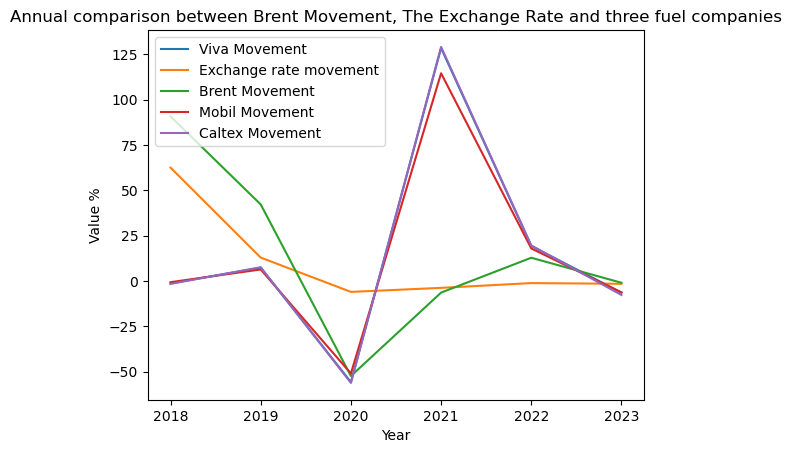

In [22]:


# Plot the line graph
ax = fuel_df1.plot(x='Year', y=['Viva Movement', 'Exchange rate movement', 'Brent Movement','Mobil Movement','Caltex Movement'], kind='line')

ax.set_xticks(fuel_df1['Year'])
ax.set_xticklabels(fuel_df1['Year'].astype(int))

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Value %')
plt.title('Annual comparison between Brent Movement, The Exchange Rate and three fuel companies')

# Show the plot
plt.show()

In [23]:
#INFLATION VS EXCHANGE RATE 

In [24]:
inflation__fuel= pd.merge(fuel_df1,inflation_df, left_index=True, right_index=True)
inflation__fuel=inflation__fuel.drop(columns=['Date_inflation'])
inflation__fuel

,Year,Viva Movement,Mobil Movement,Caltex Movement,Brent Movement,Exchange rate movement,Value_inflation
0,2018,-1.306604,-0.641509,-1.599057,90.737089,62.516432,1.50
1,2019,7.364706,6.372549,7.588235,42.215686,12.909804,1.85
2,2020,-55.747126,-50.988506,-56.195402,-52.390805,-6.000000,0.45
3,2021,128.463415,114.536585,129.073171,-6.390244,-3.780488,3.85
4,2022,19.350598,17.948207,19.613546,12.832669,-1.147410,8.05
5,2023,-6.453846,-6.261538,-7.711538,-0.973077,-1.544402,3.45


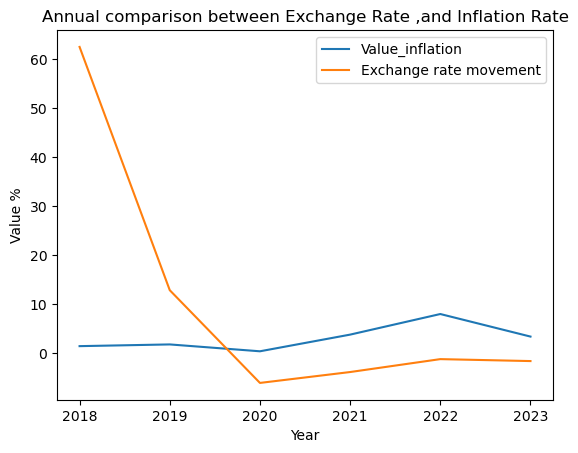

In [25]:
##cost of fuel movement vs inflation
#changing date to match 
# Plot the line graph
ax = inflation__fuel.plot(x='Year', y=['Value_inflation', 'Exchange rate movement'], kind='line')

ax.set_xticks(inflation__fuel['Year'])
ax.set_xticklabels(inflation__fuel['Year'].astype(int))

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Value %')
plt.title('Annual comparison between Exchange Rate ,and Inflation Rate')

# Show the plot
plt.show()

In [26]:
### FUEL PRICING - RETAIL 

In [27]:
#pull data for nation dist price

rows_to_skip = [0,2,3, 4, 5, 6,7,8,9,10,11]

fuel_csv1 = Path("Resources/Fuel pricing/Average DIST price.csv")
fuel_csv1 = Path("Resources/Fuel pricing/Average DIST price.csv")
fuel_pricingdata = pd.read_csv(fuel_csv1, usecols=['Year', 'National'], skiprows=lambda x: x in rows_to_skip)

# Rename the column
fuel_pricingdata = fuel_pricingdata.rename(columns={"National": "National Diesel Pump Price"})
#drop NAN                                         
fuel_pricingdata = fuel_pricingdata.dropna()
fuel_pricingdata

,Year,National Diesel Pump Price
0,2017,129.6
1,2018,149.8
2,2019,148.0
3,2020,126.9
4,2021,143.0
5,2022,207.5


In [28]:
                                                
# Convert 'Year' column to numeric data type
fuel_pricingdata['Year'] = pd.to_numeric(fuel_pricingdata['Year'], errors='coerce')
fuel_pricingdata

,Year,National Diesel Pump Price
0,2017,129.6
1,2018,149.8
2,2019,148.0
3,2020,126.9
4,2021,143.0
5,2022,207.5


In [29]:
#createing loop
results = []

# Create a loop to calculate the difference between the national diesel pump price of the current year and the previous year
for i in range(1, len(fuel_pricingdata)):
    current_year = fuel_pricingdata['Year'].iloc[i]
    previous_year = fuel_pricingdata['Year'].iloc[i-1]
    current_year_price = fuel_pricingdata['National Diesel Pump Price'].iloc[i]
    previous_year_price = fuel_pricingdata['National Diesel Pump Price'].iloc[i-1]
    difference = current_year_price - previous_year_price
    
    # Append the result to the list
    results.append({'Year': current_year, 'Dist Difference': difference})

# Convert the list into a DataFrame
df_dist = pd.DataFrame(results)

# Print the DataFrame
print(df_dist)

   Year  Dist Difference
0  2018             20.2
1  2019             -1.8
2  2020            -21.1
3  2021             16.1
4  2022             64.5


In [30]:
#pull data for national petrol price 
fuel_csv3 = Path("Resources/spendings/Consumer Price Index and selected components.csv")
fuel_csv3
fuel_petroldata = pd.read_csv(fuel_csv3,usecols=['X.1','PETROL'],skiprows=[])
fuel_petroldata =fuel_petroldata.rename(columns={"X.1": "Month/year"
                                         })
fuel_petroldata=fuel_petroldata.dropna()
fuel_petroldata

,Month/year,PETROL
0,Dec-11,98.8
1,Mar-12,101.2
2,Jun-12,101.9
3,Sep-12,97.9
4,Dec-12,100.4
5,Mar-13,101.6
6,Jun-13,98.5
7,Sep-13,106.0
8,Dec-13,104.8
9,Mar-14,109.1


In [31]:
# Convert 'PETROL' column to numeric data type
fuel_petroldata['PETROL'] = pd.to_numeric(fuel_petroldata['PETROL'], errors='coerce')

# Extract the year from 'Month/year' column
fuel_petroldata['Year'] = pd.to_datetime(fuel_petroldata['Month/year'], format='%b-%y').dt.year

# Group by 'Year' and calculate the average petrol prices per year
average_petrol_prices = fuel_petroldata.groupby('Year')['PETROL'].mean()

In [32]:
#group by year 
# Convert the 'petrol' column to numeric
fuel_petroldata['PETROL'] = pd.to_numeric(fuel_petroldata['PETROL'], errors='coerce')
fuel_petroldata['Year'] = pd.to_datetime(fuel_petroldata['Month/year'], format='%b-%y').dt.year
average_petrol_prices = fuel_petroldata.groupby('Year')['PETROL'].mean()

average_petrol_prices

Year
2011     98.800000
2012    100.350000
2013    102.725000
2014    103.750000
2015     90.200000
2016     82.900000
2017     91.500000
2018    102.725000
2019    101.475000
2020     89.225000
2021    106.400000
2022    131.875000
2023    133.933333
Name: PETROL, dtype: float64

In [33]:
#create a loop that takes the current year - previous year to get the average difference between the price then * 100 to get percentage and thats the inflation rate 

results = []
for i in range(1, len(average_petrol_prices)):
    current_year = average_petrol_prices.index[i]
    previous_year = average_petrol_prices.index[i-1]
    current_year_average = average_petrol_prices.iloc[i]
    previous_year_average = average_petrol_prices.iloc[i-1]
    difference = current_year_average - previous_year_average
    results.append({'Year': current_year, 'Petrol Difference': difference})

df_petrol = pd.DataFrame(results)
df_petrol['Year'] = df_petrol['Year'].astype(int)
print(df_petrol)

    Year  Petrol Difference
0   2012           1.550000
1   2013           2.375000
2   2014           1.025000
3   2015         -13.550000
4   2016          -7.300000
5   2017           8.600000
6   2018          11.225000
7   2019          -1.250000
8   2020         -12.250000
9   2021          17.175000
10  2022          25.475000
11  2023           2.058333


In [34]:
pricing_df = pd.merge(df_dist, df_petrol, on='Year')
pricing_df

,Year,Dist Difference,Petrol Difference
0,2018,20.2,11.225
1,2019,-1.8,-1.250
2,2020,-21.1,-12.250
3,2021,16.1,17.175
4,2022,64.5,25.475


In [35]:
inflation__fuelprice= pd.merge(pricing_df,inflation_df, left_index=True, right_index=True)
inflation__fuelprice

,Year,Dist Difference,Petrol Difference,Date_inflation,Value_inflation
0,2018,20.2,11.225,2018,1.50
1,2019,-1.8,-1.250,2019,1.85
2,2020,-21.1,-12.250,2020,0.45
3,2021,16.1,17.175,2021,3.85
4,2022,64.5,25.475,2022,8.05


In [36]:
inflation__fuelprice=inflation__fuelprice.drop(columns=['Date_inflation'])
inflation__fuelprice

,Year,Dist Difference,Petrol Difference,Value_inflation
0,2018,20.2,11.225,1.50
1,2019,-1.8,-1.250,1.85
2,2020,-21.1,-12.250,0.45
3,2021,16.1,17.175,3.85
4,2022,64.5,25.475,8.05


In [37]:
# Plot the line graph
ax = filtered_data1.plot(x='Year', y=['Dist Difference', 'Petrol Difference', 'Value_inflation'], kind='line')
ax.set_xticks(filtered_data1['Year'])
ax.set_xticklabels(filtered_data1['Year'].astype(int))

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Price Movement')
plt.title('Retail pricing vs inflation')

# Find the x-axis value for the vertical line
vertical_line_x = 2020

# Add a vertical line at the specified x-axis value
ax.axvline(x=vertical_line_x, color='red', linestyle='--', label='Lowest Point')

# Show the plot
plt.legend()
plt.show()

NameError: name 'filtered_data1' is not defined

In [ ]:
# Plot the line graph
selected_years = [2018, 2019, 2020,2021,2022,2023]

# Filter the data based on the selected years
filtered_data1 = inflation__fuelprice[inflation__fuelprice['Year'].isin(selected_years)]

# Plot the line graph
ax = filtered_data1.plot(x='Year', y=['Dist Difference', 'Petrol Difference', 'Value_inflation'], kind='line')
ax.set_xticks(filtered_data1['Year'])
ax.set_xticklabels(filtered_data1['Year'].astype(int))

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Price Movement')
plt.title('Retail pricing vs inflation')

# Show the plot
plt.show()

In [ ]:
# Plot the line graph
# Filter the DataFrame to include only certain years
desired_years = [2018, 2019, 2020,2021,2022,2023]  # Replace with the years you want to include
filtered_df = pricing_df[pricing_df['Year'].isin(desired_years)]

# Plot the line graph
ax = filtered_df.plot(x='Year', y=['Dist Difference', 'Petrol Difference'], kind='line')

# Set the x-axis ticks and labels
ax.set_xticks(filtered_df['Year'])
ax.set_xticklabels(filtered_df['Year'].astype(int))

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Price Movement')
plt.title('Petrol Prices, Dist Prices ')

# Show the plot
plt.show()

In [ ]:
# Plot the bar graph
desired_years = [2018, 2019, 2020,2021,2022,2023] 
filtered_df = pricing_df[pricing_df['Year'].isin(desired_years)]

ax = filtered_df.plot(x='Year', y=['Dist Difference', 'Petrol Difference'], kind='bar')

# Set the x-axis ticks and labels
ax.set_xticks(range(len(filtered_df['Year'])))
ax.set_xticklabels(filtered_df['Year'].astype(int))

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Price Movement')
plt.title('Petrol Prices and Dist Prices')

# Show the plot
plt.show()

In [ ]:
#### WAGE

In [ ]:
wpi_csv = Path("..\\project-1-draft\\Resources\\Wage\\WPI-.csv")
cpi_csv = Path("..\\project-1-draft\\Resources\\Wage\\CPI.csv")


In [ ]:
wpi_df = pd.read_csv(wpi_csv)
cpi_df = pd.read_csv(cpi_csv)

In [ ]:
cpi_df.head()

In [ ]:
wpi_df.head()

In [ ]:
cpi_data = {
    'Date_cpi': ['Mar-18', 'Jun-18', 'Sep-18', 'Dec-18', 'Mar-19', 'Jun-19', 'Sep-19', 'Dec-19', 'Mar-20', 'Jun-20', 'Sep-20', 'Dec-20', 'Mar-21', 'Jun-21', 'Sep-21', 'Dec-21', 'Mar-22', 'Jun-22', 'Sep-22', 'Dec-22', 'Mar-23', 'Jun-23', 'Sep-23'], 
    'Value_cpi': [1.9, 2.1, 1.9, 1.8, 1.3, 1.6, 1.7, 1.8, 2.2, -0.3, 0.7, 0.9, 1.1, 3.8, 3, 3.5, 5.1, 6.1, 7.3, 7.8, 7, 6, 5.4]
}

wpi_data = {
    'Date_wpi': ['Mar-18', 'Jun-18', 'Sep-18', 'Dec-18', 'Mar-19', 'Jun-19', 'Sep-19', 'Dec-19', 'Mar-20', 'Jun-20', 'Sep-20', 'Dec-20', 'Mar-21', 'Jun-21', 'Sep-21', 'Dec-21', 'Mar-22', 'Jun-22', 'Sep-22', 'Dec-22', 'Mar-23', 'Jun-23', 'Sep-23'], 
    'Value_wpi': [2, 2.1, 2.3, 2.3, 2.3, 2.3, 2.2, 2.2, 2.2, 1.8, 1.4, 1.3, 1.5, 1.8, 2.2, 2.4, 2.4, 2.7, 3.2, 3.3, 3.6, 3.6, 4]
}

cpi_df = pd.DataFrame(cpi_data)
wpi_df = pd.DataFrame(wpi_data)

In [ ]:
data_df = pd.merge(cpi_df, wpi_df, left_on='Date_cpi', right_on='Date_wpi')

data_df

In [ ]:
date = ('Mar-18', 'Jun-18', 'Sep-18', 'Dec-18', 'Mar-19', 'Jun-19', 'Sep-19', 'Dec-19', 'Mar-20', 'Jun-20', 'Sep-20', 'Dec-20', 'Mar-21', 'Jun-21', 'Sep-21', 'Dec-21', 'Mar-22', 'Jun-22', 'Sep-22', 'Dec-22', 'Mar-23', 'Jun-23', 'Sep-23')
value= {'CPI':(1.9, 2.1, 1.9, 1.8, 1.3, 1.6, 1.7, 1.8, 2.2, -0.3, 0.7, 0.9, 1.1, 3.8, 3, 3.5, 5.1, 6.1, 7.3, 7.8, 7, 6, 5.4), 
        'WPI':(2, 2.1, 2.3, 2.3, 2.3, 2.3, 2.2, 2.2, 2.2, 1.8, 1.4, 1.3, 1.5, 1.8, 2.2, 2.4, 2.4, 2.7, 3.2, 3.3, 3.6, 3.6, 4)
       }

x = np.arange(len(date))

# the width of the bars

width = 0.30  
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in value.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=2)
    multiplier += 1
    
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Value (%)')
ax.set_title('Comparison between Consumer price and Wage in percentage per quarter')
ax.set_xticks(x + width, date)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(-1, 10)
fig.set_size_inches(20, 6)

plt.show()


In [ ]:
#####Wage

# Define file paths
wpi_csv = Path("..\\project-1-draft\\Resources\\Wage\\WPI-.csv")
cpi_csv = Path("..\\project-1-draft\\Resources\\Wage\\CPI.csv")

In [ ]:
# Read data into DataFrames

wpi_df = pd.read_csv(wpi_csv)
cpi_df = pd.read_csv(cpi_csv)

In [ ]:
# Display the first few rows
cpi_df.head()

In [ ]:
wpi_df.head()

In [ ]:
# Define the CPI and WPI data
cpi_data = {
    'Date_cpi': ['Mar-18', 'Jun-18', 'Sep-18', 'Dec-18', 'Mar-19', 'Jun-19', 'Sep-19', 'Dec-19', 'Mar-20', 'Jun-20', 'Sep-20', 'Dec-20', 'Mar-21', 'Jun-21', 'Sep-21', 'Dec-21', 'Mar-22', 'Jun-22', 'Sep-22', 'Dec-22', 'Mar-23', 'Jun-23', 'Sep-23'], 
    'Value_cpi': [1.9, 2.1, 1.9, 1.8, 1.3, 1.6, 1.7, 1.8, 2.2, -0.3, 0.7, 0.9, 1.1, 3.8, 3, 3.5, 5.1, 6.1, 7.3, 7.8, 7, 6, 5.4]
}

wpi_data = {
    'Date_wpi': ['Mar-18', 'Jun-18', 'Sep-18', 'Dec-18', 'Mar-19', 'Jun-19', 'Sep-19', 'Dec-19', 'Mar-20', 'Jun-20', 'Sep-20', 'Dec-20', 'Mar-21', 'Jun-21', 'Sep-21', 'Dec-21', 'Mar-22', 'Jun-22', 'Sep-22', 'Dec-22', 'Mar-23', 'Jun-23', 'Sep-23'], 
    'Value_wpi': [2, 2.1, 2.3, 2.3, 2.3, 2.3, 2.2, 2.2, 2.2, 1.8, 1.4, 1.3, 1.5, 1.8, 2.2, 2.4, 2.4, 2.7, 3.2, 3.3, 3.6, 3.6, 4]
}

# Create DataFrames from the data
cpi_df = pd.DataFrame(cpi_data)
wpi_df = pd.DataFrame(wpi_data)

In [ ]:
# Merge the CPI and WPI DataFrames

data_df = pd.merge(cpi_df, wpi_df, left_on='Date_cpi', right_on='Date_wpi')

data_df

In [ ]:
# Define x-axis values

date = ('Mar-18', 'Jun-18', 'Sep-18', 'Dec-18', 'Mar-19', 'Jun-19', 'Sep-19', 'Dec-19', 'Mar-20', 'Jun-20', 'Sep-20', 'Dec-20', 'Mar-21', 'Jun-21', 'Sep-21', 'Dec-21', 'Mar-22', 'Jun-22', 'Sep-22', 'Dec-22', 'Mar-23', 'Jun-23', 'Sep-23')
value= {'CPI':(1.9, 2.1, 1.9, 1.8, 1.3, 1.6, 1.7, 1.8, 2.2, -0.3, 0.7, 0.9, 1.1, 3.8, 3, 3.5, 5.1, 6.1, 7.3, 7.8, 7, 6, 5.4), 
        'WPI':(2, 2.1, 2.3, 2.3, 2.3, 2.3, 2.2, 2.2, 2.2, 1.8, 1.4, 1.3, 1.5, 1.8, 2.2, 2.4, 2.4, 2.7, 3.2, 3.3, 3.6, 3.6, 4)
       }

x = np.arange(len(date))

# the width of the bars and initialize a multiplier
width = 0.30  
multiplier = 0

In [ ]:
# Create figure and axis objects
fig, ax = plt.subplots(layout='constrained')

# Plot the data
for attribute, measurement in value.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=2)
    multiplier += 1
    
# Add some text for labels, title, legend and custom x-axis tick labels.
ax.set_ylabel('Value (%)')
ax.set_title('Comparison between Consumer price and Wage in percentage per quarter')
ax.set_xticks(x + width, date)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(-1, 10)
fig.set_size_inches(20, 6)

plt.show()